## DBSCAN Clustering Algorithm | [Link](https://github.com/AdilShamim8/50-Days-of-Machine-Learning/tree/main/Day%2047%20Hierarchical%20%26%20DBSCAN%20Clustering/DBSCAN%20Clustering)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed (points with many nearby neighbors) while marking points that lie alone in low-density regions as outliers (noise).

---

### Key Concepts  

- **Epsilon (ε):**  
  The maximum distance between two points for one to be considered as in the neighborhood of the other.  

- **minPts (Minimum Points):**  
  The minimum number of points required to form a dense region. A point must have at least this many points within its epsilon-neighborhood to be considered a core point.

---

### Definitions and Formulas  

1. **(ε)-Neighborhood:**  
   The (ε)-neighborhood of a point \( p \) is defined as:  
   $$  
   N_\varepsilon(p) = \{q \in D \mid \|q - p\| \leq \varepsilon \}  
   $$  
   where \( D \) is the dataset and \( \|q - p\| \) is typically the Euclidean distance between \( p \) and \( q \).  

2. **Core Point:**  
   A point \( p \) is a core point if:  
   $$  
   |N_\varepsilon(p)| \geq \text{minPts}  
   $$  
   This means that there are at least `minPts` points (including \( p \)) within the \(\varepsilon\)-neighborhood of \( p \).  

3. **Border Point:**  
   A border point is not a core point but falls within the \(\varepsilon\)-neighborhood of a core point.  

4. **Noise Point:**  
   Any point that is neither a core point nor a border point is considered noise (an outlier).

---

## The DBSCAN Algorithm Steps  

1. **Visit All Points:**  
   For each point **p** in the dataset that has not yet been visited:  
   - Mark **p** as visited.  
   - Retrieve the epsilon-neighborhood **Nε(p)**.  

2. **Core Point Check:**  
   - If \( |Nε(p)| < \text{minPts} \), mark **p** as noise.  
   - If \( |Nε(p)| ≥ \text{minPts} \), then **p** is a core point and a new cluster is created.  

3. **Cluster Expansion:**  
   - Add **p** to the cluster.  
   - For each point **q** in **Nε(p)**:  
     - If **q** has not been visited, mark it as visited and retrieve **Nε(q)**.  
     - If \( |Nε(q)| ≥ \text{minPts} \), add all points in **Nε(q)** to the cluster.  
     - If **q** is not already part of any cluster, add **q** to the current cluster.  

4. **Repeat:**  
   Continue the process until all points in the dataset have been visited.

---

### Python Code Example

Below is an example implementation of DBSCAN using the `scikit-learn` library:


Cluster labels: [ 0  0  0  1  1 -1]


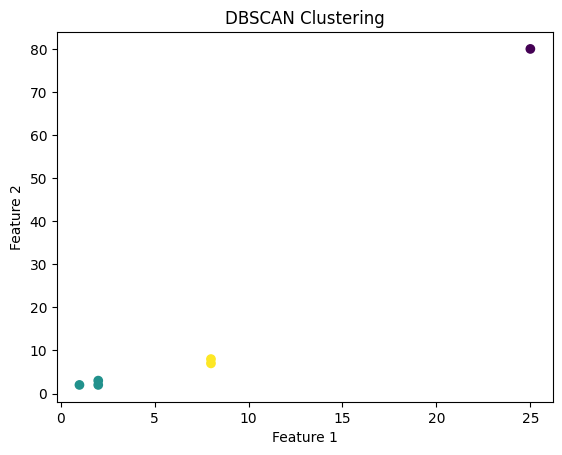

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([
    [1, 2], [2, 2], [2, 3],
    [8, 7], [8, 8], [25, 80]
])

# Create DBSCAN instance with epsilon (eps) = 3 and minimum samples (min_samples) = 2
dbscan = DBSCAN(eps=3, min_samples=2)
clusters = dbscan.fit_predict(X)

print("Cluster labels:", clusters)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()